## CME538 GROUP PROJECT
TTC SUBWAY, TTC BUS AND OC-TRANSPO EXPLORATORY DATA ANALYSIS


### Set up Notebook

In [9]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [54]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")

## TTC SUBWAY

In [11]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


### Outliers

In [12]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]


In [13]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,102486.000000,102486.000000,102486.000000,102486.00000
mean,54011.082167,1.729475,3.081777,3530.84354
std,31069.249287,2.529287,4.378530,2654.52430
min,0.000000,0.000000,0.000000,0.00000
25%,27281.250000,0.000000,0.000000,0.00000
50%,53817.500000,0.000000,0.000000,5167.00000
75%,80963.750000,3.000000,7.000000,5646.00000
max,108003.000000,10.000000,27.000000,69021.00000


C:\Users\diana\AppData\Local\Temp\ipykernel_4972\1108744901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')


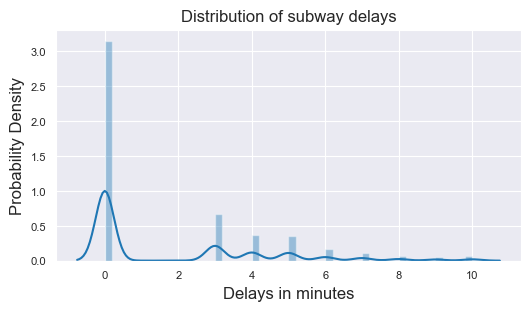

In [14]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

In [15]:
#Merge Date and Time Columns
ttc_subway_df['Datetime'] = pd.to_datetime(ttc_subway_df['Date']+' '+ ttc_subway_df['Time'])

#Drop Unnamed column
ttc_subway_df = ttc_subway_df.drop(['Unnamed: 0'], axis=1)
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Datetime
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022-01-01 15:59:00
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022-01-01 02:23:00
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022-01-01 22:00:00
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022-01-01 02:28:00
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022-01-01 02:34:00


In [16]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102486 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       102486 non-null  object        
 1   Time       102486 non-null  object        
 2   Day        102486 non-null  object        
 3   Station    102486 non-null  object        
 4   Code       102486 non-null  object        
 5   Min Delay  102486 non-null  int64         
 6   Min Gap    102486 non-null  int64         
 7   Bound      73761 non-null   object        
 8   Line       102157 non-null  object        
 9   Vehicle    102486 non-null  int64         
 10  Datetime   102486 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 9.4+ MB


### Time-based indexing

In [17]:
# Set the Date column as the index
ttc_subway_df.set_index('Datetime', inplace = True)
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Datetime,,,,,,,,,,
2022-01-01 15:59:00,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01 02:23:00,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01 22:00:00,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01 02:28:00,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01 02:34:00,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [18]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df['hour'] = ttc_subway_df.index.hour

In [202]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       102486 non-null  datetime64[ns]
 1   Time       102486 non-null  datetime64[ns]
 2   Day        102486 non-null  object        
 3   Station    102486 non-null  object        
 4   Code       102486 non-null  object        
 5   Min Delay  102486 non-null  int64         
 6   Min Gap    102486 non-null  int64         
 7   Bound      73761 non-null   object        
 8   Line       102157 non-null  object        
 9   Vehicle    102486 non-null  int64         
 10  year       102486 non-null  int32         
 11  month      102486 non-null  int32         
 12  month_day  102486 non-null  int32         
 13  hour       102486 non-null  int32         
dtypes: datetime64[ns](2), int32(4), int64(3), object(5)
memory usage: 10.2+ MB


In [203]:
non_numeric_columns = ttc_subway_df.select_dtypes(exclude ='number').columns
ttc_subway_df_numeric = ttc_subway_df.drop(columns= non_numeric_columns)
ttc_subway_df_numeric.head()

,Min Delay,Min Gap,Vehicle,year,month,month_day,hour
Datetime,,,,,,,
2022-01-01 15:59:00,0,0,3023,2022,1,1,15
2022-01-01 02:23:00,0,0,0,2022,1,1,2
2022-01-01 22:00:00,0,0,0,2022,1,1,22
2022-01-01 02:28:00,0,0,0,2022,1,1,2
2022-01-01 02:34:00,0,0,5981,2022,1,1,2


### Seasonal changes

In [ ]:
#Resample to monthly frecuency, taking the sum of values within each month
ttc_subway_df_resampled = ttc_subway_df.resample('M').sum()
ttc_subway_df_resampled

In [209]:
#Plot Toronto Delay 
sns.set()  
plt.figure(figsize=(12,5))
sns.barplot(x=ttc_subway_df.index, y=ttc_subway_df['Min Delay'],errorbar= None)

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000022B935B9300> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022B9389A840> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

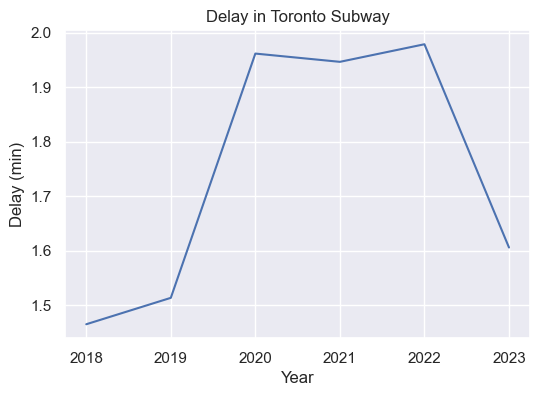

<Figure size 640x480 with 0 Axes>

In [212]:
#Plot Toronto Delay by year 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['year'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")
plt.show()



In [214]:
# Save the plot 
plt.savefig('1.Delay in Toronto Subway.jpg')

<Figure size 640x480 with 0 Axes>

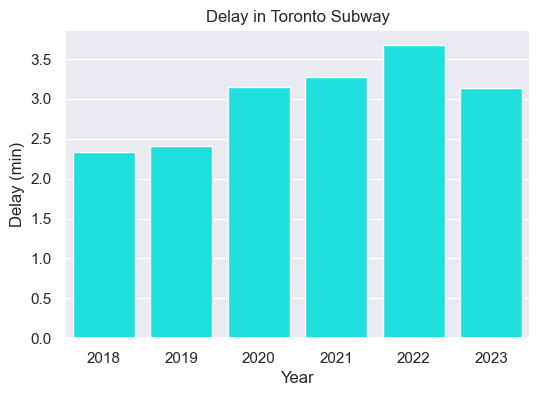

In [226]:
#Plot Toronto Delay by year 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.barplot(x=ttc_subway_df['year'], y=ttc_subway_df['Min Delay'],errorbar=None, color= 'cyan')

# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")
plt.show()

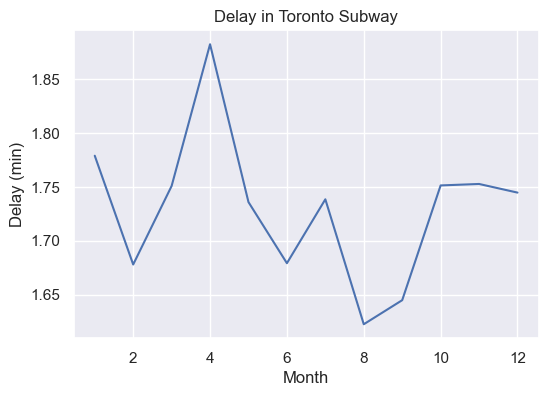

In [77]:
#Plot Toronto Delay by month 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

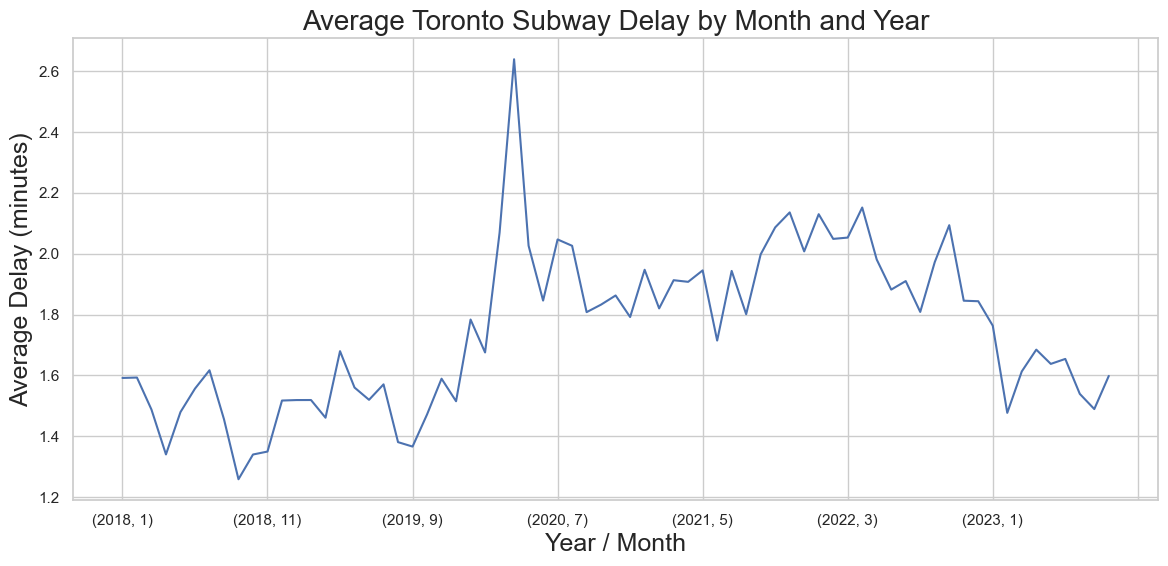

In [45]:
#Average Delay by month and year
plt.figure(figsize=(14, 6))
ax = ttc_subway_df.groupby(["year", "month"])["Min Delay"].mean().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
ax.set_title('Average Toronto Subway Delay by Month and Year', fontsize=20)

plt.show()

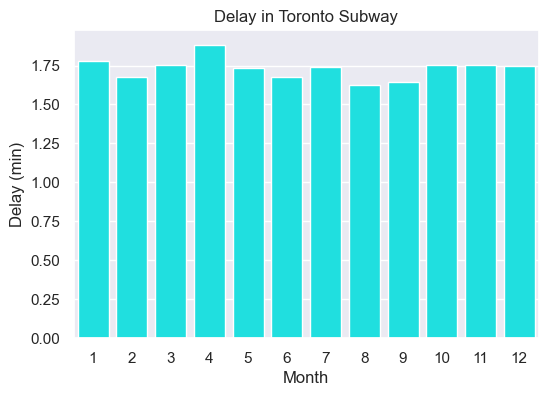

In [218]:
#Plot Toronto Delay by month 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.barplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None, color ='cyan')

# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

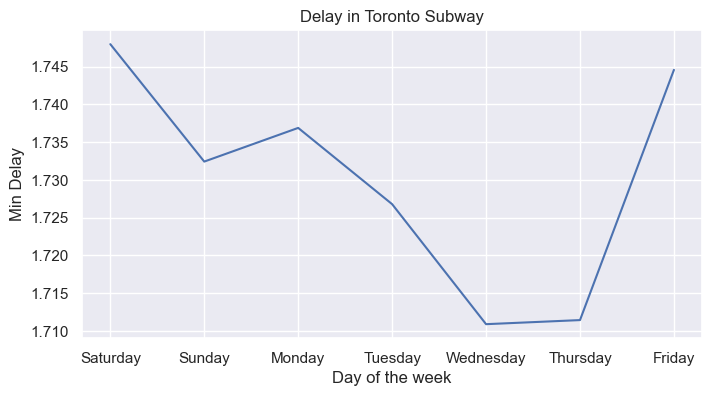

In [78]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

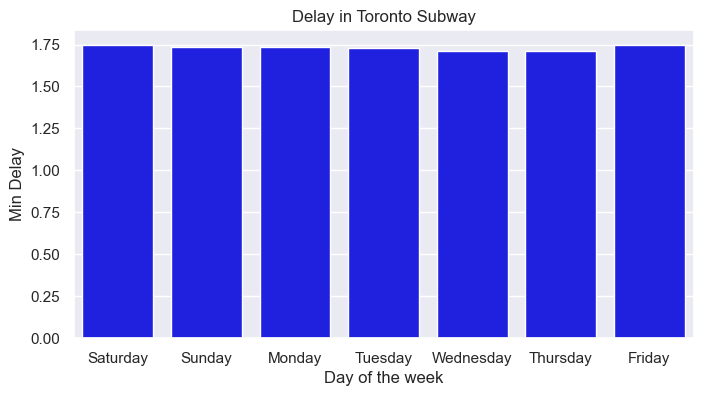

In [230]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.barplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None, color ='blue')

# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

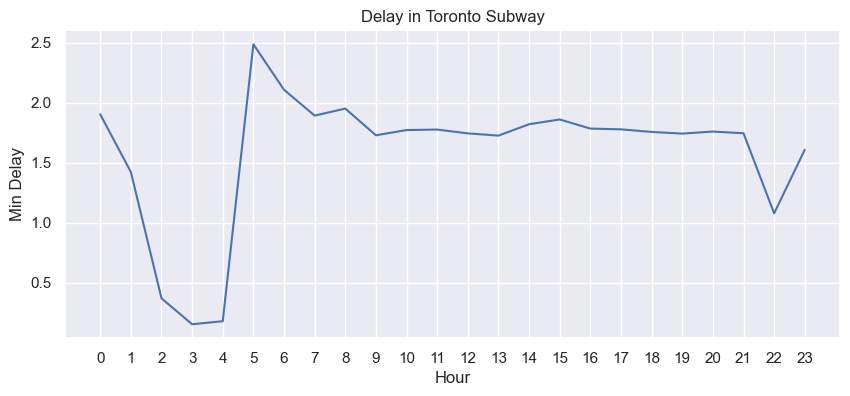

In [79]:
#Plot Toronto subway Delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['hour'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Hour', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.xticks(range(0, 24, 1))

plt.show()

In [80]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle,year,month,month_day,hour
count,102486.000000,102486.000000,102486.000000,102486.00000,102486.000000,102486.000000,102486.000000,102486.000000
mean,54011.082167,1.729475,3.081777,3530.84354,2020.405851,6.291269,15.865074,13.056144
std,31069.249287,2.529287,4.378530,2654.52430,1.750560,3.403803,8.827406,6.395107
min,0.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,0.000000
25%,27281.250000,0.000000,0.000000,0.00000,2019.000000,3.000000,8.000000,8.000000
50%,53817.500000,0.000000,0.000000,5167.00000,2020.000000,6.000000,16.000000,14.000000
75%,80963.750000,3.000000,7.000000,5646.00000,2022.000000,9.000000,24.000000,18.000000
max,108003.000000,10.000000,27.000000,69021.00000,2023.000000,12.000000,31.000000,23.000000


### Peak and off-peak hours
Add a column to specify if it is a peak hour or not. 
According to the TTC peak hours are 6-9a.m and 3-7p.m

In [176]:
#Add peak hours column
#Function to determine if a given datime is in peak hour

def is_peak_hour(dt):
    hour = dt.hour
    return 1 if ((6 <= hour <= 9) or (15 <= hour <= 19)) else 0

#Apply function to create a new column 'peakhour'

ttc_subway_df['peakhour'] = ttc_subway_df.index.to_series().apply(is_peak_hour)

ttc_subway_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour
Datetime,,,,,,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15,1
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2,0
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22,0
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2,0
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2,0


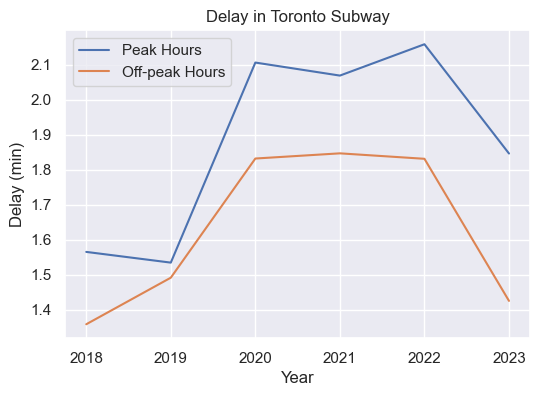

In [177]:
#Plot Toronto subway Delay by year with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

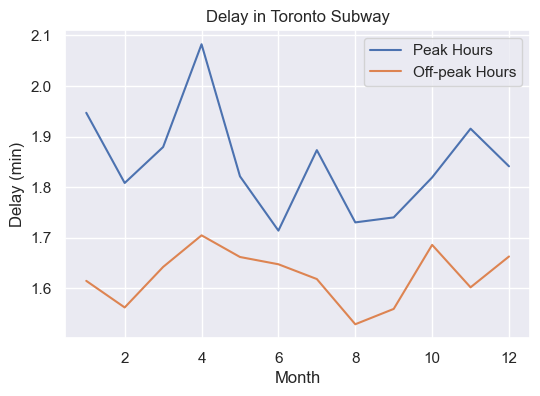

In [85]:
#Plot Toronto subway Delay by month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

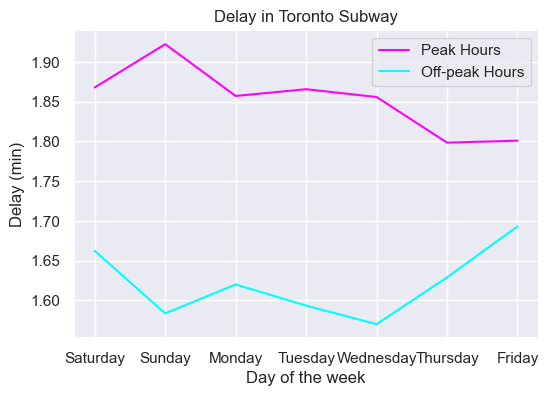

In [86]:
#Plot Toronto subway Delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

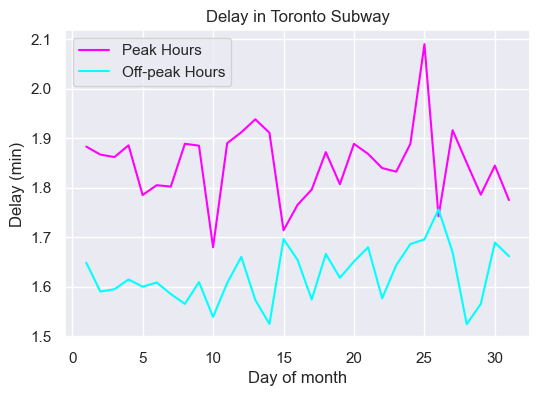

In [87]:
#Plot Toronto subway Delay by day of the month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

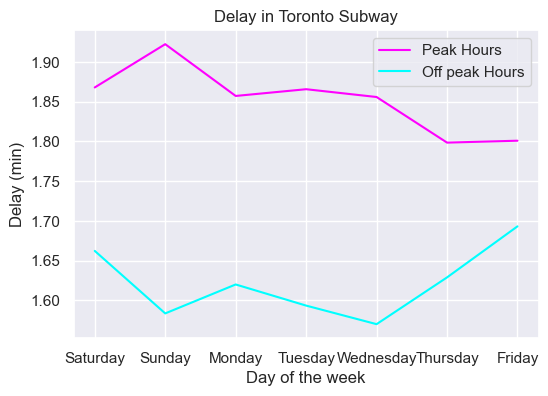

In [88]:
#Plot Toronto subway Delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

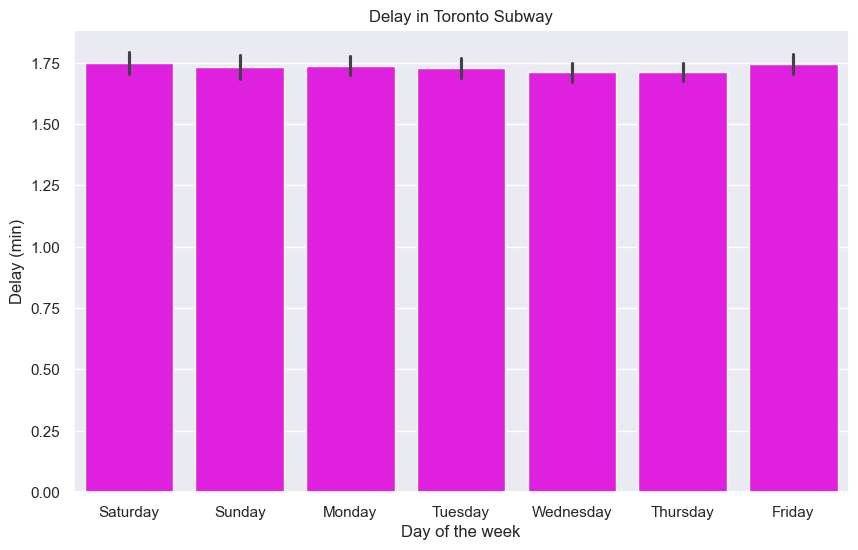

In [185]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(10, 6))

# Barplot 
sns.barplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'], color='#FF00FF')
# Set labels and title
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")
plt.show()


### Seasons

In [89]:
# Add seasons column
def get_season(month):
    if 3 <= month <=5:
        return 'Spring'
    elif 6<=month <=8:
        return 'Summer'
    elif 9<=month <=11:
        return 'Fall'
    else: 
        return 'Winter'

#Apply the function
ttc_subway_df['season'] = ttc_subway_df['month'].apply(get_season)

ttc_subway_df.tail()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,
2021-12-31 01:10:00,107999,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591,2021,12,31,1,0,Winter
2021-12-31 01:12:00,108000,Friday,FINCH STATION,SUDP,5,10,S,YU,5983,2021,12,31,1,0,Winter
2021-12-31 01:21:00,108001,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046,2021,12,31,1,0,Winter
2021-12-31 01:37:00,108002,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536,2021,12,31,1,0,Winter
2021-12-31 07:00:00,108003,Friday,DON MILLS STATION,TUSC,0,0,E,SHP,6146,2021,12,31,7,1,Winter


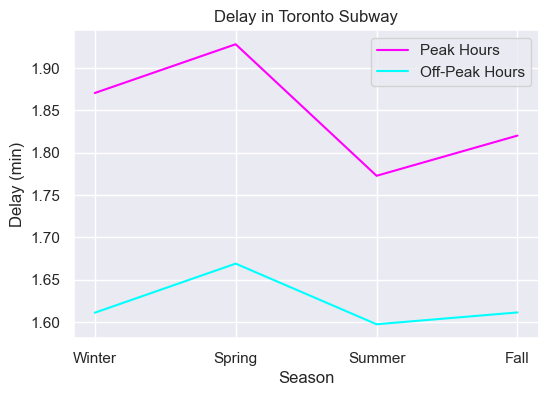

In [90]:
#Plot Toronto subway Delay by season with peak hours

sns.set()  
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

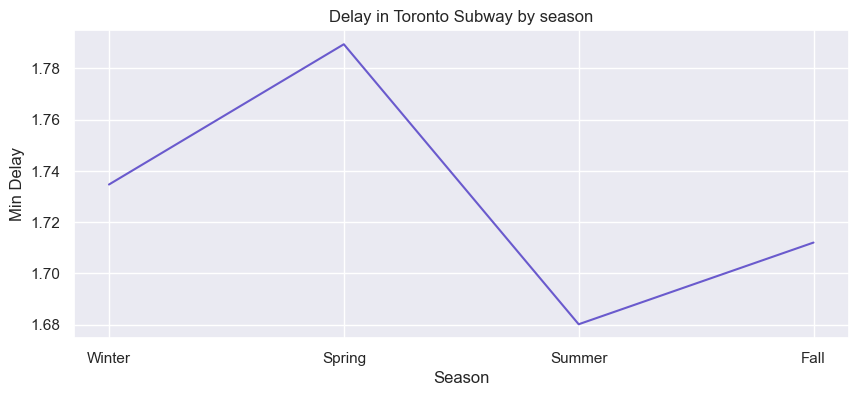

In [91]:
#Plot Toronto subway Delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['season'], y=ttc_subway_df['Min Delay'],errorbar=None, color='#6A5ACD')

# Set labels 
plt.xlabel('Season', fontsize=12)
plt.title("Delay in Toronto Subway by season")

plt.show()

### Unique Values

In [92]:
# Unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



Number of unique Stations: 826
Number of unique codes: 206
Number of unique bound: 7
Number of unique lines: 55
Number of unique vehicles: 1068


### Stations

In [93]:
#Make a list of the unique "Station' values
unique_stations =  ttc_subway_df['Station'].unique()
print(unique_stations)
unique_stations_list = unique_stations.tolist()

['LAWRENCE EAST STATION' 'SPADINA BD STATION' 'KENNEDY SRT STATION TO'
 'VAUGHAN MC STATION' 'EGLINTON STATION' 'QUEEN STATION'
 'DAVISVILLE STATION' 'ST PATRICK STATION' 'PAPE STATION' 'WILSON STATION'
 'KENNEDY BD STATION' 'FINCH STATION' 'YONGE BD STATION'
 'ST ANDREW STATION' 'MAIN STREET STATION' 'HIGH PARK STATION'
 'GREENWOOD STATION' 'COXWELL STATION' 'WELLESLEY STATION'
 'SHEPPARD WEST STATION' 'BLOOR STATION' 'UNION STATION'
 'ST GEORGE YUS STATION' 'ROSEDALE STATION' 'ISLINGTON STATION'
 'HIGHWAY 407 STATION' 'KIPLING STATION' 'YONGE/UNIVERSITY AND B'
 'ST GEORGE BD STATION' 'CHRISTIE STATION' 'BESSARION STATION'
 'MCCOWAN STATION' 'ST CLAIR WEST STATION' 'YORKDALE STATION'
 'WARDEN STATION' 'COLLEGE STATION' 'RUNNYMEDE STATION' 'DUPONT STATION'
 'KEELE STATION' 'LAWRENCE WEST STATION' 'LANSDOWNE STATION'
 'NORTH YORK CTR STATION' 'DUNDAS STATION' 'DUNDAS WEST STATION'
 'ROYAL YORK STATION' 'FINCH WEST STATION' 'SHERBOURNE STATION'
 'KENNEDY SRT STATION' 'ELLESMERE STATION' 

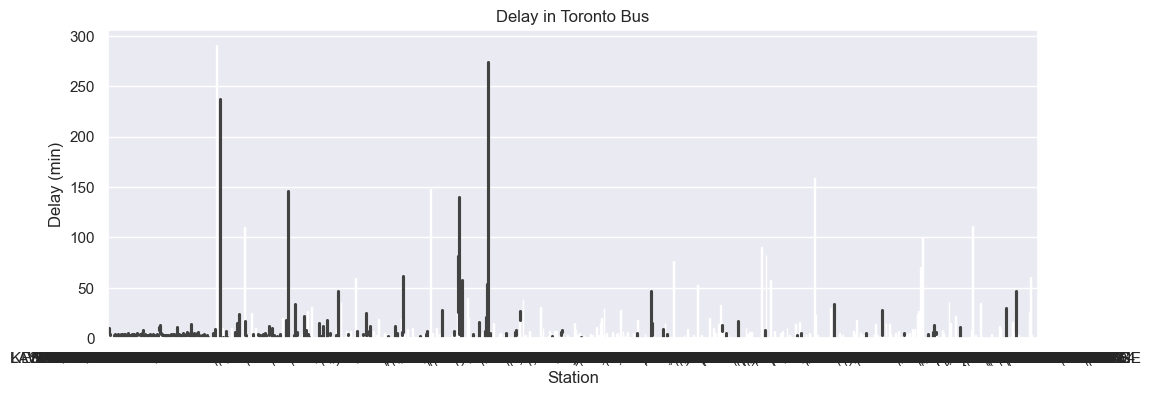

In [232]:
# Plot Toronto subway Delay stations
sns.set()  
plt.figure(figsize=(12,4))
sns.barplot(x=ttc_bus_df['Station'], y= ttc_bus_df['Min Delay'], color='#FF00FF')

# Set labels 
plt.xlabel('Station', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()

C:\Users\diana\AppData\Local\Temp\ipykernel_4972\98027137.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


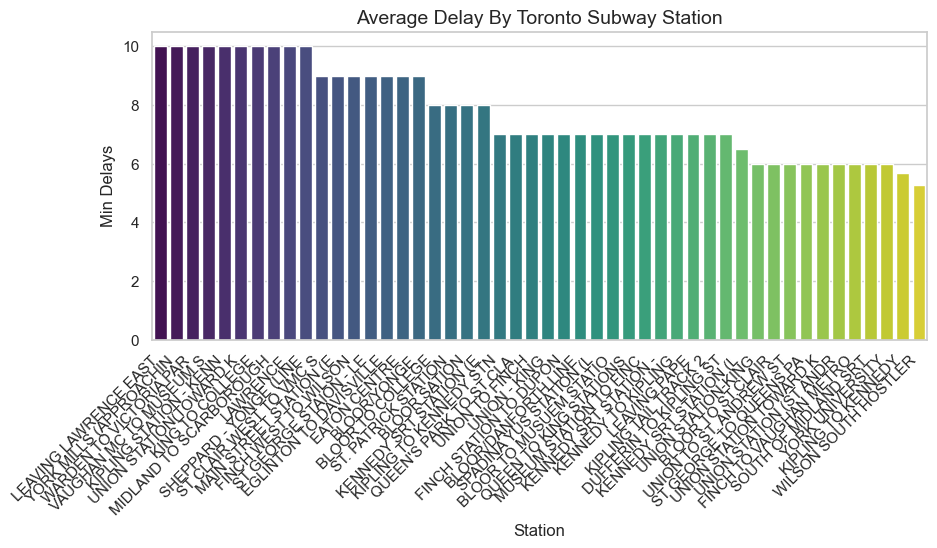

In [41]:
# Barplot of Min Delay and Code for TTC Subway
ttc_subway_agg_station = ttc_subway_df.groupby('Station')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station = ttc_subway_agg_station[ttc_subway_agg_station['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Station', y='Min Delay', data=ttc_subway_agg_sorted_station, palette='viridis', hue = 'Station', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Station', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Subway Station', fontsize=14)

# Show the plot
plt.show()

In [44]:
ttc_subway_agg_sorted_station 

,Station,Min Delay
349,LEAVING LAWRENCE EAST,10.000000
799,YORK MILLS (APPROACHIN,10.000000
678,WARDEN TO VICTORIA PAR,10.000000
665,VAUGHAN MC TO MUSEUM S,10.000000
306,KIPLING STATION - KENN,10.000000
642,UNION STATION(TOWARD K,10.000000
295,KING TO COLLEGE,10.000000
402,MIDLAND TO SCARBOROUGH,10.000000
329,LAWRENCE,10.000000
477,SHEPPARD - YONGE (LINE,10.000000


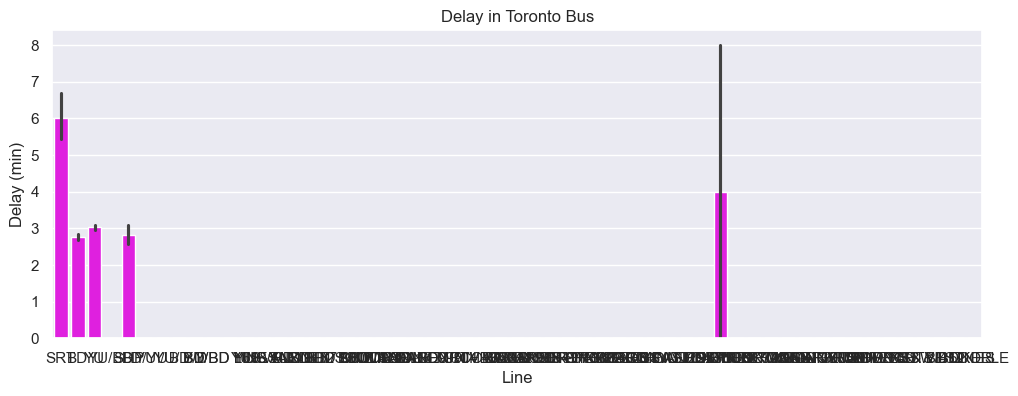

In [234]:
# Plot Toronto subway Delay stations
sns.set()  
plt.figure(figsize=(12,4))
sns.barplot(x=ttc_bus_df['Line'], y= ttc_bus_df['Min Delay'], color='#FF00FF')

  
# Set labels 
plt.xlabel('Line', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()


### Codes

In [32]:
#Make a list of the unique "Code' values
unique_codes =  ttc_subway_df['Code'].unique()
unique_codes_list = unique_codes.tolist()
print('list of codes:',unique_codes_list)

#Make a list of the unique "Bound' values
unique_bound =  ttc_subway_df['Bound'].unique()
unique_bound_list = unique_bound.tolist()
print('List of bound:',unique_bound_list)

#Make a list of the unique "Lines' values
unique_lines =  ttc_subway_df['Line'].unique()
unique_lines_list = unique_lines.tolist()
print('List of lines:',unique_lines_list)

list of codes: ['SRDP', 'MUIS', 'MRO', 'MUATC', 'MUNCA', 'TUATC', 'MUSC', 'TUNOA', 'TUO', 'SUO', 'PUOPO', 'MUIRS', 'MUIE', 'SUDP', 'SUUT', 'MUSAN', 'MUD', 'MUPR1', 'MUO', 'EUPI', 'TUMVS', 'MUI', 'TRNOA', 'SUAE', 'TRO', 'PUSSW', 'EUDO', 'PUMEL', 'SUAP', 'TUSC', 'PUMST', 'PUSAC', 'MUPAA', 'SUSA', 'PUSTS', 'PUSIS', 'ERDO', 'MRTO', 'EUYRD', 'EUSC', 'MUTO', 'TUNIP', 'TUOS', 'PUSO', 'ERCD', 'ERTC', 'TUCC', 'MUCL', 'SRSA', 'MUIR', 'EUNT', 'MRPAA', 'SUG', 'SUEAS', 'TUSUP', 'EUOE', 'MRNOA', 'PUMO', 'EUO', 'MUNOA', 'PUTD', 'MUPLC', 'PUSTC', 'ERRA', 'PRO', 'SUPOL', 'PUTO', 'SUROB', 'MRDD', 'EUCD', 'MUDD', 'TUS', 'MUTD', 'TRST', 'TUST', 'EUAC', 'MRUI', 'TUOPO', 'TUML', 'MRWEA', 'MRPLA', 'MUWEA', 'MUFM', 'PUTOE', 'PUTIS', 'PUEO', 'EUBK', 'EUTR', 'PUSRA', 'EUCA', 'MRIE', 'PUSI', 'PUSNT', 'PRSO', 'PUTR', 'ERLV', 'EUAL', 'PUTIJ', 'PRSL', 'TRTC', 'PUTWZ', 'EUBO', 'PUSZC', 'MUWR', 'MRCL', 'PUCSS', 'EUME', 'EUATC', 'MRSAN', 'PREL', 'ERBO', 'SRO', 'TUSET', 'SRUT', 'ERHV', 'ERO', 'MRPLB', 'TRNCA', 'PUTDN',

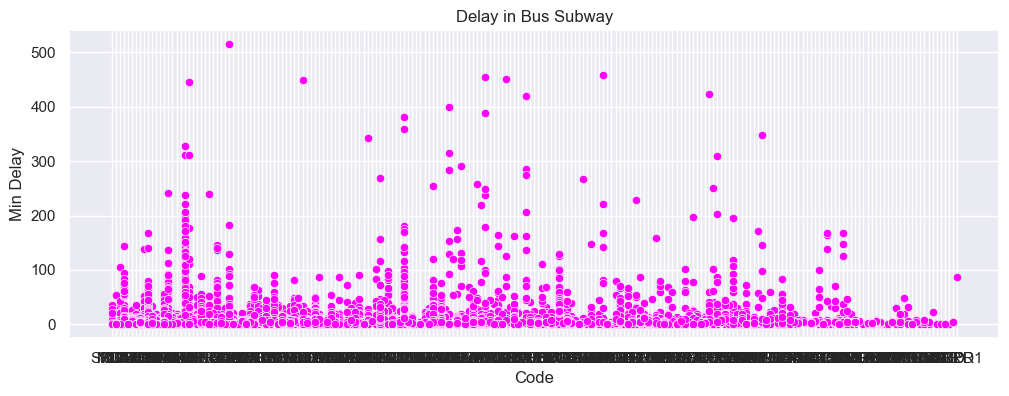

In [235]:
# Plot Toronto subway Delay codes
sns.set()  
plt.figure(figsize=(12,4))
sns.scatterplot(x=ttc_bus_df['Code'], y= ttc_bus_df['Min Delay'], color='#FF00FF')

# Set labels 
plt.xlabel('Code', fontsize=12)
plt.ylabel('Min Delay', fontsize=12)
plt.title("Delay in Bus Subway")
plt.show()

C:\Users\diana\AppData\Local\Temp\ipykernel_4972\2213336287.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


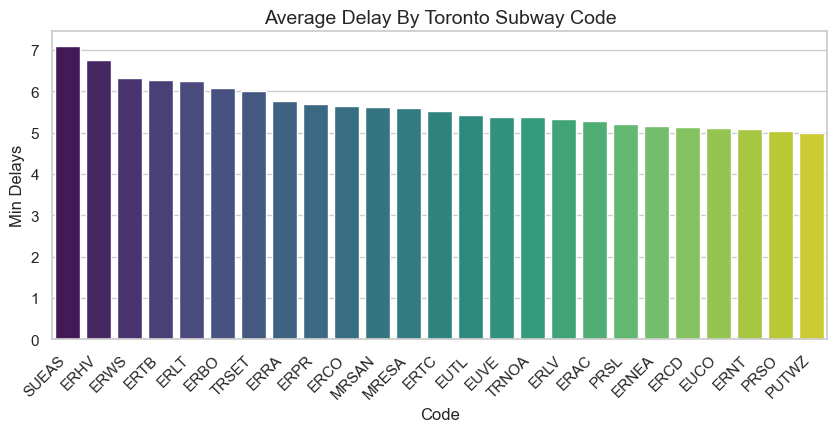

In [31]:
# Barplot of Min Delay and Code for TTC Subway
ttc_subway_agg_code = ttc_subway_df.groupby('Code')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_code = ttc_subway_agg_code[ttc_subway_agg_code['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Code', y='Min Delay', data=ttc_subway_agg_sorted_code, palette='viridis', hue = 'Code', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Code', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Subway Code', fontsize=14)

# Show the plot
plt.show()

In [34]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       102486 non-null  object
 1   Time       102486 non-null  object
 2   Day        102486 non-null  object
 3   Station    102486 non-null  object
 4   Code       102486 non-null  object
 5   Min Delay  102486 non-null  int64 
 6   Min Gap    102486 non-null  int64 
 7   Bound      73761 non-null   object
 8   Line       102157 non-null  object
 9   Vehicle    102486 non-null  int64 
 10  year       102486 non-null  int32 
 11  month      102486 non-null  int32 
 12  month_day  102486 non-null  int32 
 13  hour       102486 non-null  int32 
dtypes: int32(4), int64(3), object(7)
memory usage: 10.2+ MB


In [32]:
ttc_subway_agg_sorted_code.head()

,Code,Min Delay
172,SUEAS,7.095652
6,ERHV,6.750000
21,ERWS,6.333333
15,ERTB,6.285714
7,ERLT,6.250000


In [37]:
# Dictionary for string replacements
object_replacement_dict = {'SUEAS': 'Emergency Alarm Station Activation', 'ERHV': 'High Voltage',
                            'ERWS': 'Wind Shield', 'ERTB': 'Track Brakes', 'ERLT': 'Trainline System'}

# Function to replace each string 
def replace_strings_with_values(lst):
    return [object_replacement_dict.get(str(item), item) for item in lst]

# Apply the custom function to replace strings in the specified column
ttc_subway_agg_sorted_code['Code_name'] = ttc_subway_agg_sorted_code['Code'].apply(replace_strings_with_values)

print(ttc_subway_agg_sorted_code)

      Code  Min Delay        Code_name
172  SUEAS   7.095652  [S, U, E, A, S]
6     ERHV   6.750000     [E, R, H, V]
21    ERWS   6.333333     [E, R, W, S]
15    ERTB   6.285714     [E, R, T, B]
7     ERLT   6.250000     [E, R, L, T]
1     ERBO   6.076923     [E, R, B, O]
185  TRSET   6.000000  [T, R, S, E, T]
14    ERRA   5.769231     [E, R, R, A]
13    ERPR   5.695122     [E, R, P, R]
3     ERCO   5.642857     [E, R, C, O]
65   MRSAN   5.625000  [M, R, S, A, N]
55   MRESA   5.600000  [M, R, E, S, A]
16    ERTC   5.524229     [E, R, T, C]
44    EUTL   5.423077     [E, U, T, L]
49    EUVE   5.386364     [E, U, V, E]
183  TRNOA   5.380282  [T, R, N, O, A]
8     ERLV   5.333333     [E, R, L, V]
0     ERAC   5.285714     [E, R, A, C]
109   PRSL   5.214286     [P, R, S, L]
10   ERNEA   5.153846  [E, R, N, E, A]
2     ERCD   5.146341     [E, R, C, D]
29    EUCO   5.120000     [E, U, C, O]
11    ERNT   5.086957     [E, R, N, T]
110   PRSO   5.037037     [P, R, S, O]
156  PUTWZ   5.003968  [P

In [ ]:
# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_code = ttc_subway_agg_code[ttc_subway_agg_code['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Code', y='Min Delay', data=ttc_subway_agg_sorted_code, palette='viridis', hue = 'Code', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Code', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Subway Code', fontsize=14)

# Show the plot
plt.show()

### Line

C:\Users\diana\AppData\Local\Temp\ipykernel_2124\919868843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


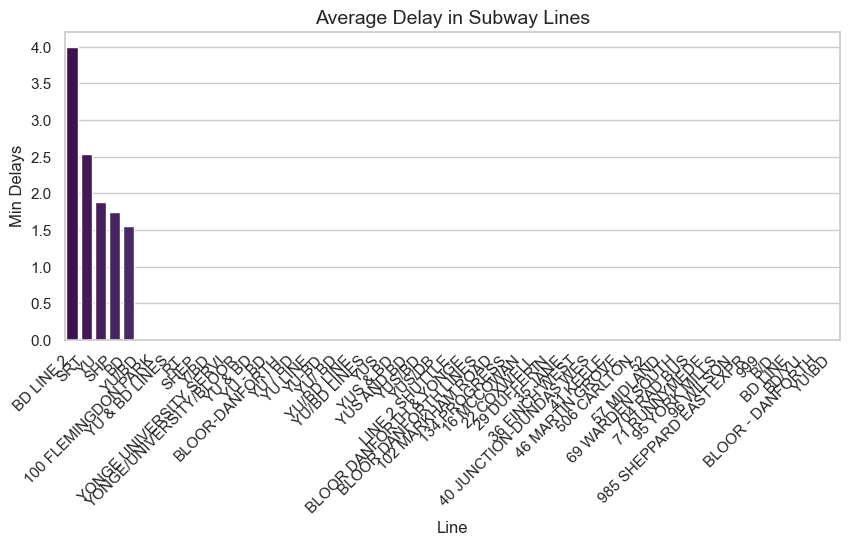

In [239]:
# Barplot of Min Delay and Line for TTC Subway
ttc_subway_df_agg = ttc_subway_df.groupby('Line')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_df_agg_sorted = ttc_subway_df_agg.sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Line', y='Min Delay', data=ttc_subway_df_agg_sorted, palette='viridis', hue = 'Line', legend= False)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Line', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay in Subway Lines', fontsize=14)

# Show the plot
plt.show()

In [119]:
# Check for duplicates in Line column
duplicates = ttc_subway_df['Line'].duplicated()
print(ttc_subway_df[duplicates])

                     Unnamed: 0       Day                 Station   Code  \
Datetime                                                                   
2022-01-01 22:00:00           2  Saturday  KENNEDY SRT STATION TO    MRO   
2022-01-01 02:34:00           4  Saturday        EGLINTON STATION  MUATC   
2022-01-01 05:40:00           5  Saturday           QUEEN STATION  MUNCA   
2022-01-01 06:56:00           6  Saturday      DAVISVILLE STATION  MUNCA   
2022-01-01 06:58:00           7  Saturday      ST PATRICK STATION  MUNCA   
...                         ...       ...                     ...    ...   
2021-12-31 01:10:00      107999    Friday          MUSEUM STATION   SUUT   
2021-12-31 01:12:00      108000    Friday           FINCH STATION   SUDP   
2021-12-31 01:21:00      108001    Friday   EGLINTON WEST STATION  PUOPO   
2021-12-31 01:37:00      108002    Friday   SHEPPARD WEST STATION   SUDP   
2021-12-31 07:00:00      108003    Friday       DON MILLS STATION   TUSC   

           

### Subway Correlation Analysis

In [204]:
#Correlate ttc subway features
correlation  = ttc_subway_df_numeric.corr()
plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap of ttc subway features')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()


In [207]:
#PLot correlations 
num_var = ['Min Delay','Min Gap','Vehicle','year','peakhour']
sns.pairplot(ttc_subway_df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

KeyError: "['peakhour'] not in index"

I calculated the total # of trips per day, then found the number of delayed trips per day and divided them (and then took reliability to be 1 - that percentage of delayed trips)

In [ ]:
#Of Trips per day
#delayed trips per day
#reliability 1- percentage of trips delay

#Calculate number of trips per day

ttc_subway_df

### Reliability


In [4]:
ttc_subway_df

,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981
...,...,...,...,...,...,...,...,...,...,...,...
107999,107999,2021-12-31,01:10,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591
108000,108000,2021-12-31,01:12,Friday,FINCH STATION,SUDP,5,10,S,YU,5983
108001,108001,2021-12-31,01:21,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046
108002,108002,2021-12-31,01:37,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536


In [7]:
ttcsubway_delay_perday = ttc_subway_df.groupby(["Date", "Day", "Line"]).count().reset_index()
ttcsubway_delay_perday.head()

,Date,Day,Line,Unnamed: 0,Time,Station,Code,Min Delay,Min Gap,Bound,Vehicle
0,2018-01-01,Monday,BD,29,29,29,29,29,29,21,29
1,2018-01-01,Monday,SHP,1,1,1,1,1,1,0,1
2,2018-01-01,Monday,SRT,4,4,4,4,4,4,4,4
3,2018-01-01,Monday,YU,23,23,23,23,23,23,17,23
4,2018-01-01,Monday,YU/BD,1,1,1,1,1,1,0,1


## TTC BUS 

In [55]:
ttc_bus_df.head()
#importing wrong csv?


,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [247]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,108004.000000,108004.000000,108004.000000,108004.000000
mean,54001.500000,2.971066,4.399124,3619.806989
std,31178.213574,9.874597,10.585862,2622.799270
min,0.000000,0.000000,0.000000,0.000000
25%,27000.750000,0.000000,0.000000,0.000000
50%,54001.500000,0.000000,0.000000,5186.000000
75%,81002.250000,4.000000,8.000000,5656.000000
max,108003.000000,515.000000,519.000000,69021.000000


### Outliers

In [248]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1_bus= ttc_bus_df['Min Delay'].quantile(0.25)
Q3_bus= ttc_bus_df['Min Delay'].quantile(0.75)
IQR_bus =Q3_bus-Q1_bus

#Define the bounds for outlier removal
lower_bound_bus= Q1_bus-1.5*IQR
upper_bound_bus= Q3_bus +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_bus_df['Min Delay']<= upper_bound_bus)
ttc_bus_df = ttc_bus_df[mask]

# View DataFrame
ttc_bus_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102486 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Date        102486 non-null  object
 2   Time        102486 non-null  object
 3   Day         102486 non-null  object
 4   Station     102486 non-null  object
 5   Code        102486 non-null  object
 6   Min Delay   102486 non-null  int64 
 7   Min Gap     102486 non-null  int64 
 8   Bound       73761 non-null   object
 9   Line        102157 non-null  object
 10  Vehicle     102486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.4+ MB


In [249]:
#Merge Date and Time Columns
ttc_bus_df['Datetime'] = pd.to_datetime(ttc_bus_df['Date']+' '+ ttc_bus_df['Time'])
ttc_bus_df = ttc_bus_df.drop(['Date','Time'], axis=1)
ttc_bus_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Datetime
0,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022-01-01 15:59:00
1,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022-01-01 02:23:00
2,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022-01-01 22:00:00
3,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022-01-01 02:28:00
4,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022-01-01 02:34:00


In [250]:
# Set the datetime colum as the index
ttc_bus_df.set_index('Datetime', inplace = True)
ttc_bus_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Datetime,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [251]:
# Add new columns 'year', 'month' and 'month_day' that indicate the year, month and day associated with each observation

ttc_bus_df['year'] = ttc_bus_df.index.year
ttc_bus_df['month'] = ttc_bus_df.index.month
ttc_bus_df['month_day'] = ttc_bus_df.index.day
ttc_bus_df['hour'] = ttc_bus_df.index.hour

### Peak hours

In [252]:
#Add peak hours column
#Apply function to create a new column 'peakhour'
ttc_bus_df['peakhour'] = ttc_bus_df.index.to_series().apply(is_peak_hour)

ttc_bus_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour
Datetime,,,,,,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15,1
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2,0
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22,0
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2,0
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2,0


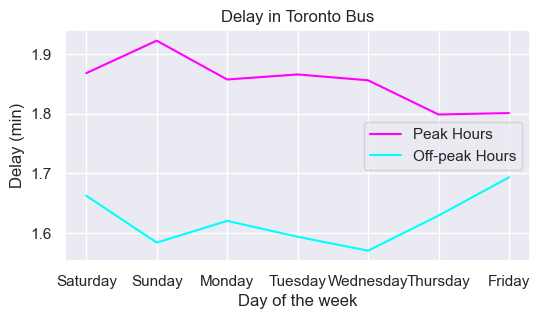

In [259]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()

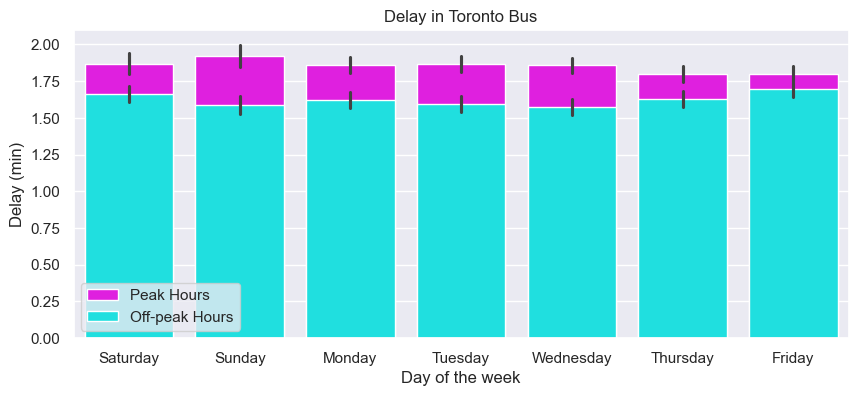

In [258]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(10, 4))

# Filter data for peak and off-peak hours
peak_hours_data = ttc_bus_df[ttc_bus_df['peakhour'] == 1]
off_peak_hours_data = ttc_bus_df[ttc_bus_df['peakhour'] == 0]

# Barplot for Peak Hours
sns.barplot(x=peak_hours_data['Day'], y=peak_hours_data['Min Delay'], color='#FF00FF', label='Peak Hours')

# Barplot for Off-peak Hours
sns.barplot(x=off_peak_hours_data['Day'], y=off_peak_hours_data['Min Delay'], color='#00FFFF', label='Off-peak Hours')

# Set labels and title
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

# Show the legend
plt.legend()

plt.show()


### Season

In [255]:
#Apply the function
ttc_bus_df['season'] = ttc_bus_df['month'].apply(get_season)

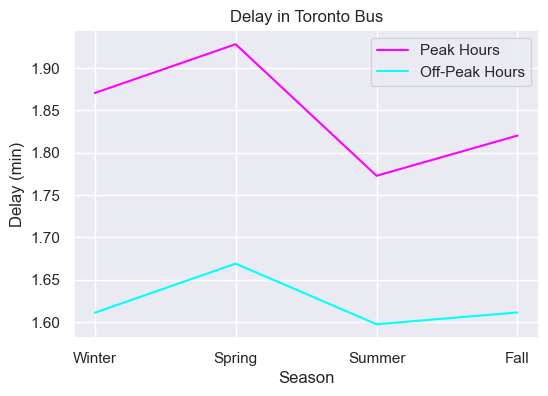

In [256]:
# Plot Toronto bus Delay by season with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()


### Code


C:\Users\diana\AppData\Local\Temp\ipykernel_2124\1167207172.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


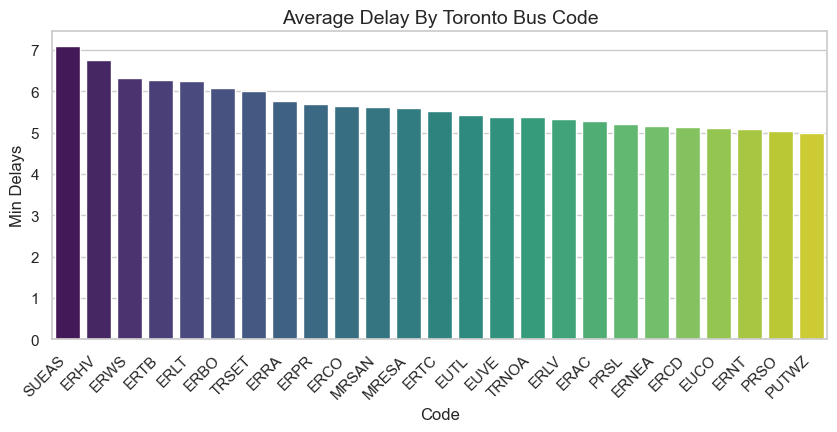

In [257]:
# Barplot of Min Delay and Code for TTC Subway
ttc_bus_agg_code = ttc_bus_df.groupby('Code')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_bus_agg_sorted_code = ttc_bus_agg_code[ttc_bus_agg_code['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Code', y='Min Delay', data=ttc_bus_agg_sorted_code, palette='viridis', hue = 'Code', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Code', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Bus Code', fontsize=14)

# Show the plot
plt.show()

## TTC STREETCAR

## Mode of Transportation comparison

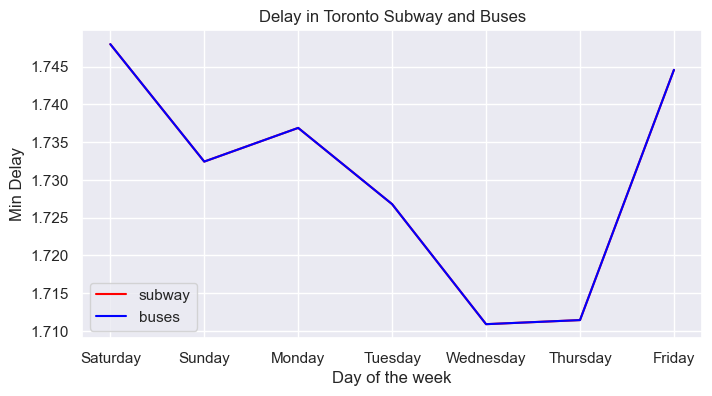

In [48]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['Day'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0
#plt.ylim(0, 3.5)
plt.show()

In [49]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Day         102486 non-null  object
 2   Station     102486 non-null  object
 3   Code        102486 non-null  object
 4   Min Delay   102486 non-null  int64 
 5   Min Gap     102486 non-null  int64 
 6   Bound       73761 non-null   object
 7   Line        102157 non-null  object
 8   Vehicle     102486 non-null  int64 
 9   year        102486 non-null  int32 
 10  month       102486 non-null  int32 
 11  month_day   102486 non-null  int32 
 12  hour        102486 non-null  int32 
 13  peakhour    102486 non-null  int64 
 14  season      102486 non-null  object
dtypes: int32(4), int64(5), object(6)
memory usage: 10.9+ MB


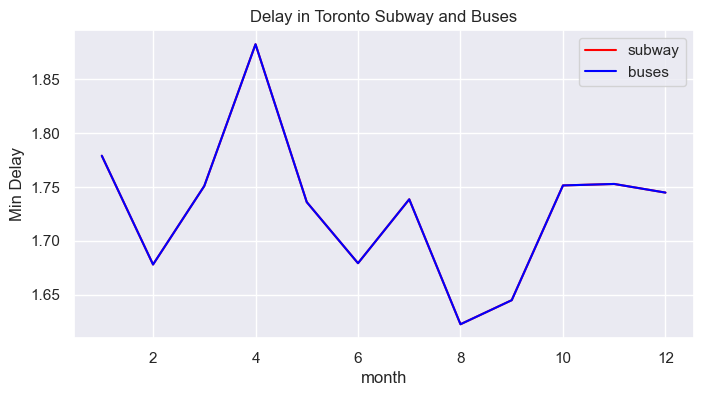

In [50]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['month'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('month', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0

plt.show()


## TORONTO WEATHER

In [47]:
toronto_weather = pd.read_csv("toronto_weather_simplified.csv")
toronto_weather.head(10)

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),...,Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01,2019,1,1,6.1,...,NaN,0.0,NaN,0.4,NaN,NaN,29.0,NaN,55.0,NaN
1,1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-02,2019,1,2,0.4,...,NaN,0.0,NaN,2.1,NaN,NaN,NaN,M,NaN,M
2,2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-03,2019,1,3,1.8,...,NaN,0.0,NaN,0.0,NaN,NaN,24.0,NaN,48.0,NaN
3,3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-04,2019,1,4,6.6,...,NaN,0.0,NaN,0.0,NaN,NaN,24.0,NaN,41.0,NaN
4,4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-05,2019,1,5,3.6,...,NaN,0.0,NaN,0.0,NaN,NaN,23.0,NaN,39.0,NaN
5,5,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-06,2019,1,6,5.0,...,NaN,0.0,NaN,0.0,NaN,NaN,32.0,NaN,52.0,NaN
6,6,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-07,2019,1,7,5.2,...,NaN,0.0,NaN,2.7,NaN,NaN,8.0,NaN,63.0,NaN
7,7,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-08,2019,1,8,8.7,...,NaN,0.0,NaN,3.8,NaN,NaN,22.0,NaN,41.0,NaN
8,8,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-09,2019,1,9,3.4,...,NaN,0.0,NaN,0.2,NaN,NaN,28.0,NaN,67.0,NaN
9,9,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-10,2019,1,10,-3.3,...,NaN,0.0,NaN,0.0,NaN,NaN,31.0,NaN,61.0,NaN


In [48]:
toronto_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1826 non-null   int64  
 1   Longitude (x)              1826 non-null   float64
 2   Latitude (y)               1826 non-null   float64
 3   Station Name               1826 non-null   object 
 4   Climate ID                 1826 non-null   int64  
 5   Date/Time                  1826 non-null   object 
 6   Year                       1826 non-null   int64  
 7   Month                      1826 non-null   int64  
 8   Day                        1826 non-null   int64  
 9   Max Temp (°C)              1736 non-null   float64
 10  Max Temp Flag              59 non-null     object 
 11  Min Temp (°C)              1736 non-null   float64
 12  Min Temp Flag              59 non-null     object 
 13  Mean Temp (°C)             1736 non-null   float

In [53]:
#Drop undesired columns
columns_to_drop = ['Unnamed: 0','Climate ID','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                   'Heat Deg Days Flag','Cool Deg Days Flag','Total Precip Flag','Snow on Grnd (cm)']
toronto_weather = toronto_weather.drop(columns=columns_to_drop)
toronto_weather.head()

,Longitude (x),Latitude (y),Station Name,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.63,TORONTO CITY CENTRE,2019-01-01,2019,1,1,6.1,-6.7,-0.3,18.3,0.0,0.4,29.0,NaN,55.0,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,2019-01-02,2019,1,2,0.4,-7.9,-3.8,21.8,0.0,2.1,NaN,M,NaN,M
2,-79.4,43.63,TORONTO CITY CENTRE,2019-01-03,2019,1,3,1.8,-0.4,0.7,17.3,0.0,0.0,24.0,NaN,48.0,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,2019-01-04,2019,1,4,6.6,1.5,4.1,13.9,0.0,0.0,24.0,NaN,41.0,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,2019-01-05,2019,1,5,3.6,1.2,2.4,15.6,0.0,0.0,23.0,NaN,39.0,NaN


In [54]:
toronto_weather.describe()

,Longitude (x),Latitude (y),Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
count,1.826000e+03,1826.00,1826.000000,1826.000000,1826.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1759.000000,1462.000000,1462.000000
mean,-7.940000e+01,43.63,2020.999452,6.523549,15.727820,13.028111,5.953514,9.507949,9.404263,0.912212,1.982149,20.675103,48.372093
std,2.842950e-14,0.00,1.414407,3.449478,8.801735,9.995527,9.269847,9.533541,8.381935,1.861269,5.167422,10.594275,12.766089
min,-7.940000e+01,43.63,2019.000000,1.000000,1.000000,-13.600000,-21.000000,-17.300000,0.000000,0.000000,0.000000,1.000000,32.000000
25%,-7.940000e+01,43.63,2020.000000,4.000000,8.000000,4.600000,-0.625000,2.100000,0.000000,0.000000,0.000000,7.000000,39.000000
50%,-7.940000e+01,43.63,2021.000000,7.000000,16.000000,12.300000,5.500000,8.800000,9.200000,0.000000,0.000000,24.000000,46.000000
75%,-7.940000e+01,43.63,2022.000000,10.000000,23.000000,22.325000,14.500000,18.425000,15.900000,0.425000,1.000000,30.000000,55.000000
max,-7.940000e+01,43.63,2023.000000,12.000000,31.000000,34.900000,24.000000,29.300000,35.300000,11.300000,60.400000,36.000000,118.000000


In [55]:
#Merge Date and Time Columns
toronto_weather['Datetime'] = pd.to_datetime(toronto_weather['Date/Time'])

# Set the datetime colum as the index
toronto_weather.set_index('Datetime', inplace = True)
toronto_weather.head()

,Longitude (x),Latitude (y),Station Name,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Datetime,,,,,,,,,,,,,,,,,
2019-01-01,-79.4,43.63,TORONTO CITY CENTRE,2019-01-01,2019,1,1,6.1,-6.7,-0.3,18.3,0.0,0.4,29.0,NaN,55.0,NaN
2019-01-02,-79.4,43.63,TORONTO CITY CENTRE,2019-01-02,2019,1,2,0.4,-7.9,-3.8,21.8,0.0,2.1,NaN,M,NaN,M
2019-01-03,-79.4,43.63,TORONTO CITY CENTRE,2019-01-03,2019,1,3,1.8,-0.4,0.7,17.3,0.0,0.0,24.0,NaN,48.0,NaN
2019-01-04,-79.4,43.63,TORONTO CITY CENTRE,2019-01-04,2019,1,4,6.6,1.5,4.1,13.9,0.0,0.0,24.0,NaN,41.0,NaN
2019-01-05,-79.4,43.63,TORONTO CITY CENTRE,2019-01-05,2019,1,5,3.6,1.2,2.4,15.6,0.0,0.0,23.0,NaN,39.0,NaN


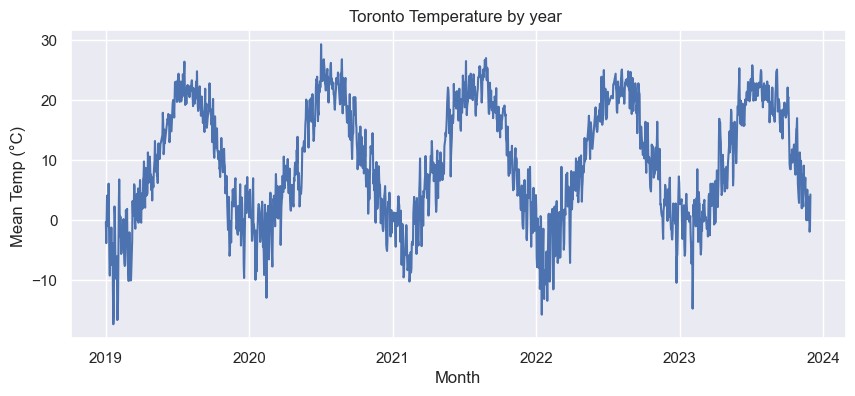

In [134]:
#Plot Toronto Temperature by year 
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=toronto_weather.index, y=toronto_weather['Mean Temp (°C)'],errorbar=None)

# Set labels 
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temp (°C) ', fontsize=12)
plt.title("Toronto Temperature by year ")

plt.show()

In [133]:
ttc_subway_df.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,
2022-01-01 15:59:00,0,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15,1,Winter
2022-01-01 02:23:00,1,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2,0,Winter
2022-01-01 22:00:00,2,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22,0,Winter
2022-01-01 02:28:00,3,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2,0,Winter
2022-01-01 02:34:00,4,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2,0,Winter


### Mean temperature

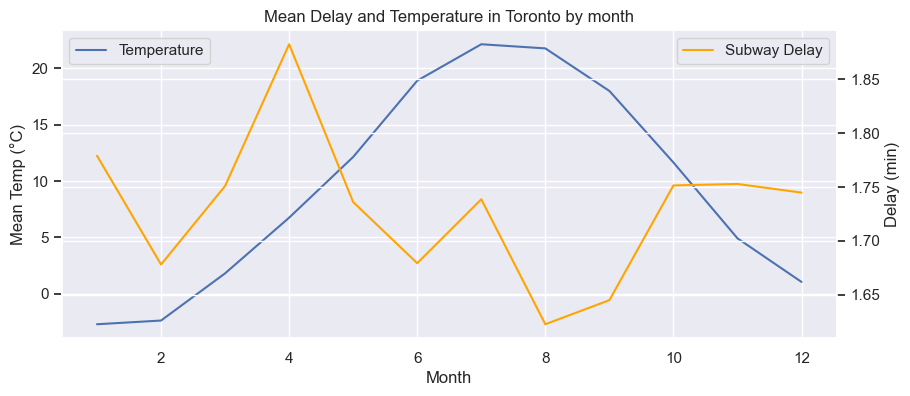

In [49]:
# Plot Toronto Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Mean Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

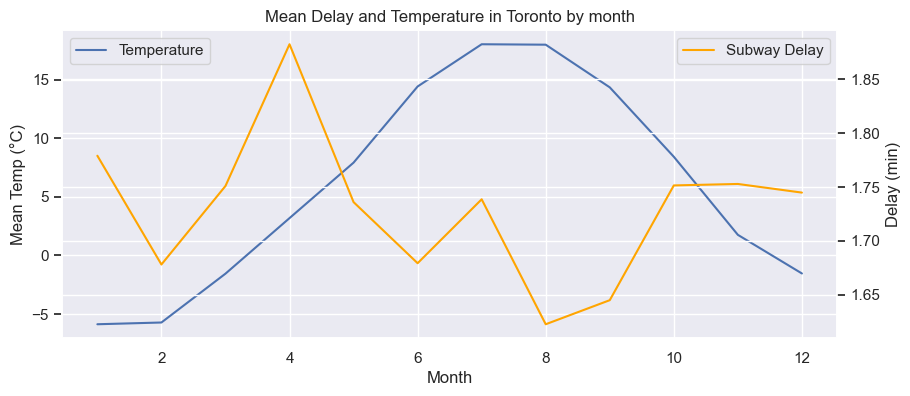

In [51]:
# Plot Toronto Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Min Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [153]:
# Filter data for 2019
toronto_weather_2019 = toronto_weather[(toronto_weather.index >='2019-01-01') &(toronto_weather.index <='2019-12-31')]
ttc_subway_df_2019 = ttc_subway_df[(ttc_subway_df.index >='2019-01-01') &(ttc_subway_df.index <='2019-12-31')]


In [152]:
ttc_subway_df_2019.head()

,Unnamed: 0,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,
2019-01-01 01:08:00,40632,Tuesday,YORK MILLS STATION,PUSI,0,0,S,YU,5766,2019,1,1,1,0,Winter
2019-01-01 02:14:00,40633,Tuesday,ST ANDREW STATION,PUMST,0,0,NaN,YU,0,2019,1,1,2,0,Winter
2019-01-01 02:16:00,40634,Tuesday,JANE STATION,TUSC,0,0,W,BD,5117,2019,1,1,2,0,Winter
2019-01-01 02:27:00,40635,Tuesday,BLOOR STATION,SUO,0,0,N,YU,5436,2019,1,1,2,0,Winter
2019-01-01 03:09:00,40638,Tuesday,DUPONT STATION,EUATC,6,11,N,YU,5381,2019,1,1,3,0,Winter


In [ ]:
# Plot Toronto Subway and Mean Temp (C)
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))
sns.lineplot(x=toronto_weather_2019.index, y=toronto_weather_2019['Mean Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Toronto Temperature and Subway Delay")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df_2019_down.indexb, y=ttc_subway_df_2019_down['Min Delay'], ax=ax2, color='orange', label='Subway Delay', errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

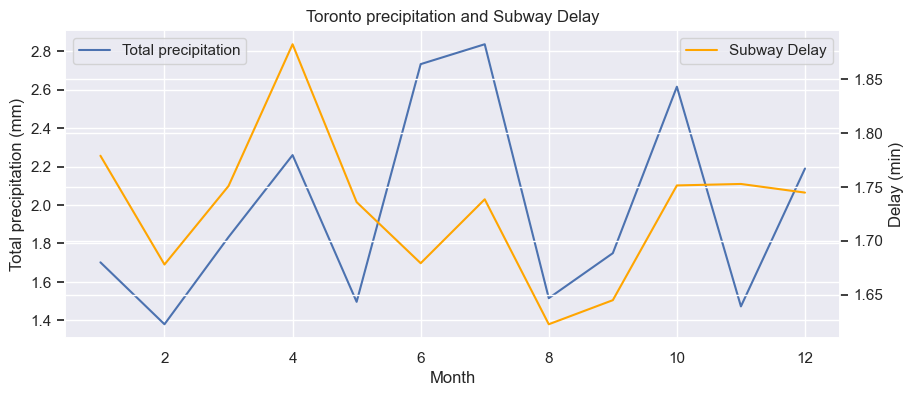

In [58]:
# Plot Toronto total Precip (mm) by year
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Total Precip (mm)'], ax=ax1, label='Total precipitation', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total precipitation (mm)', fontsize=12)
ax1.set_title("Toronto precipitation and Subway Delay")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axesb
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

ValueError: cannot reindex on an axis with duplicate labels

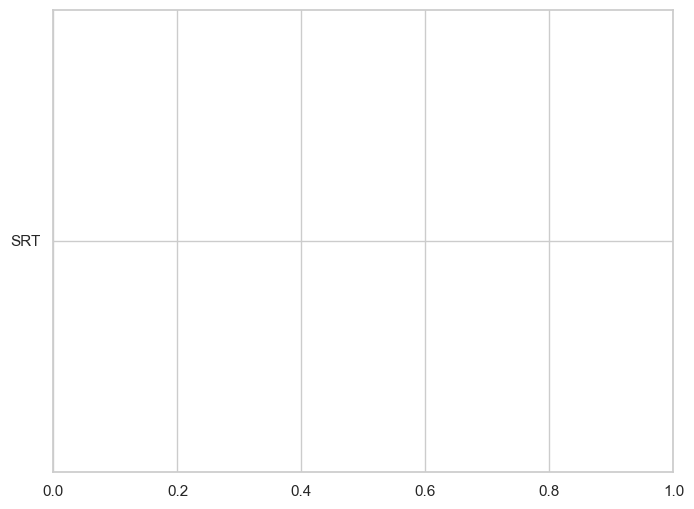

In [59]:
sns.set(style="whitegrid")  # Optional: Set a style for the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ttc_subway_df['Min Delay'], y=ttc_subway_df['Line'], data=toronto_weather, color='blue', marker='o', s=100)

# Set labels and title
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Scatter', fontsize=14)

# Show the plot
plt.show()